In [1]:
import matplotlib.pyplot as plt
import numpy as np

import view_gluon

import utils

utils.set_mplstyle()

In [2]:
Nt = 64

renorm_mu = -58
escale = 1.7606
Tc=167

In [3]:
results = {}

for mode in ["VOS","VR","FULL"]: 

    prop = view_gluon.propagator(Nt,mode,n_samples='all',gtype="coulomb")
    print(Nt,len(prop.prop_info))
    q = prop.q
    D = prop.D
    
    # Z3 average
    qz3, Dz3 = prop.Z3_average(q,D)
    
    # _,_ = prop.half_cut()
    
    prop.q = qz3
    prop.D = Dz3
    
    # Cone cut
    qc, Dc = prop.cone_cut(radius=1)
    
    # Lattice momentum correction
    qi = prop.correct_q(qc,qtype="improved")
    
    # Renormalize
    prop.renormalize(xi=3.453)
    
    results[mode] = {'f':prop.f.copy(), 'D': prop.D.copy(),'alpha':prop.alpha,'q':qi, 'Nconf':len(prop.prop_info), 'chisq': prop.chisq, 'prop_info': prop.prop_info}


32 50


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = xi*p0/norm_p


32 50


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = xi*p0/norm_p


32 25


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = xi*p0/norm_p


In [4]:
from mpl_toolkits import mplot3d

In [5]:
results["FULL"]['q']

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.19634793],
       [0.        , 0.        , 0.        , 0.3926479 ],
       ...,
       [2.29551897, 2.2542249 , 2.2542249 , 2.29551897],
       [2.29551897, 2.2542249 , 2.29551897, 2.29551897],
       [2.29551897, 2.29551897, 2.29551897, 2.29551897]])

/tmp/ipykernel_1074619/329329807.py:20: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


Text(0.5, 0.92, '$32\\times 32^3$-VR')

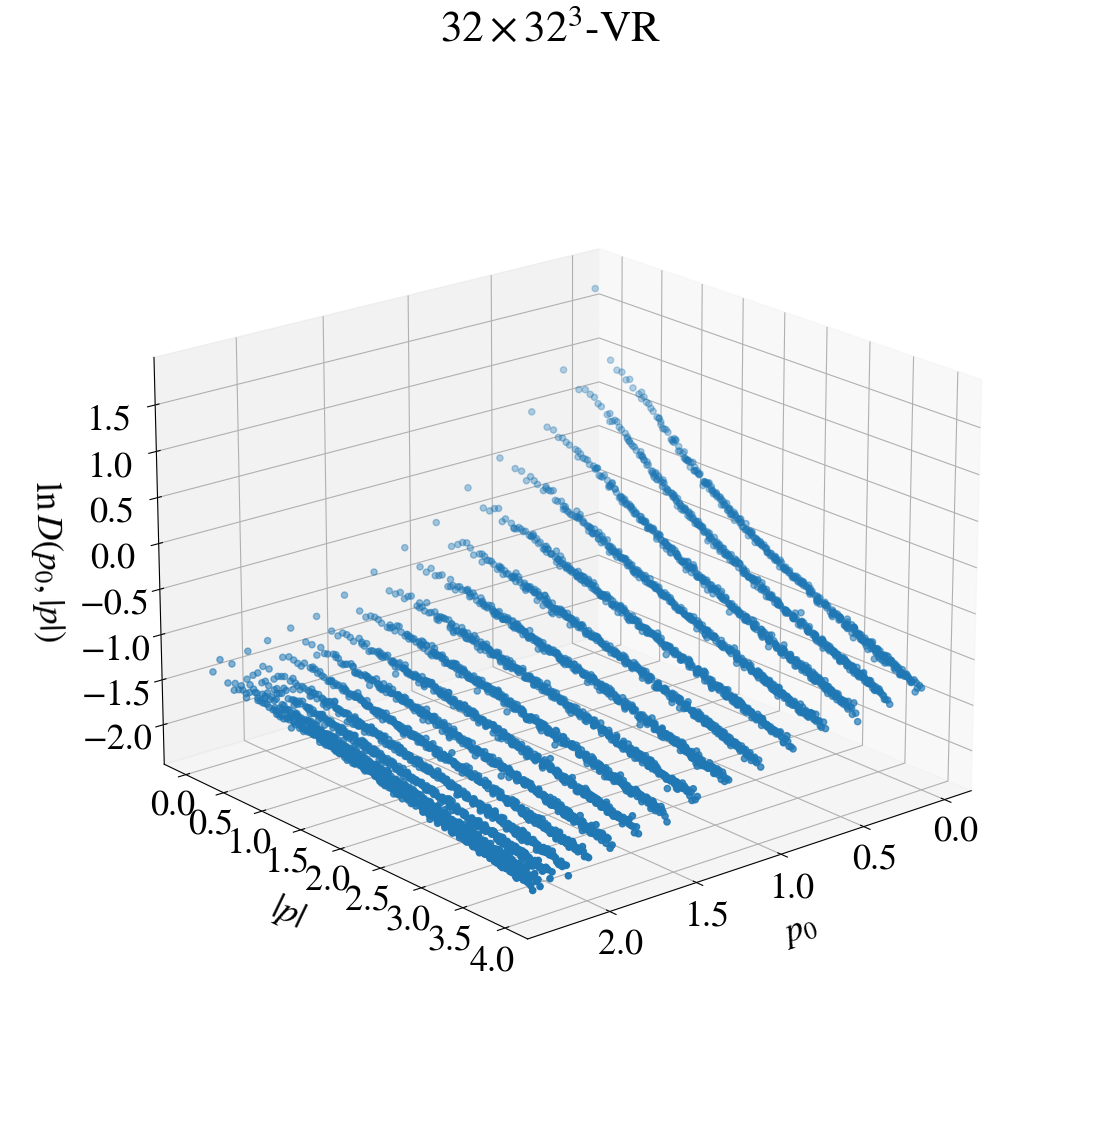

In [46]:
fig = plt.figure(figsize=(12,12))

mode = "VR"

q = results[mode]['q']
D = results[mode]['D']

q_norm = np.asarray([np.linalg.norm(qi[1:]) for qi in q])
q0 = q[:,0]

ax = plt.axes(projection='3d')
ax.scatter(q0,q_norm,np.log([d.mean for d in D]))
ax.view_init(20,50)

ax.set_xlabel('$p_0$',labelpad=25)
ax.set_ylabel('$|p|$',labelpad=25)
ax.set_zlabel('$\ln{D(p_0,|p|)}$',labelpad=35)

ax.tick_params(axis='z', which='major', pad=15)
ax.dist = 12
ax.set_title(f'${Nt}\\times 32^3$-{mode}')

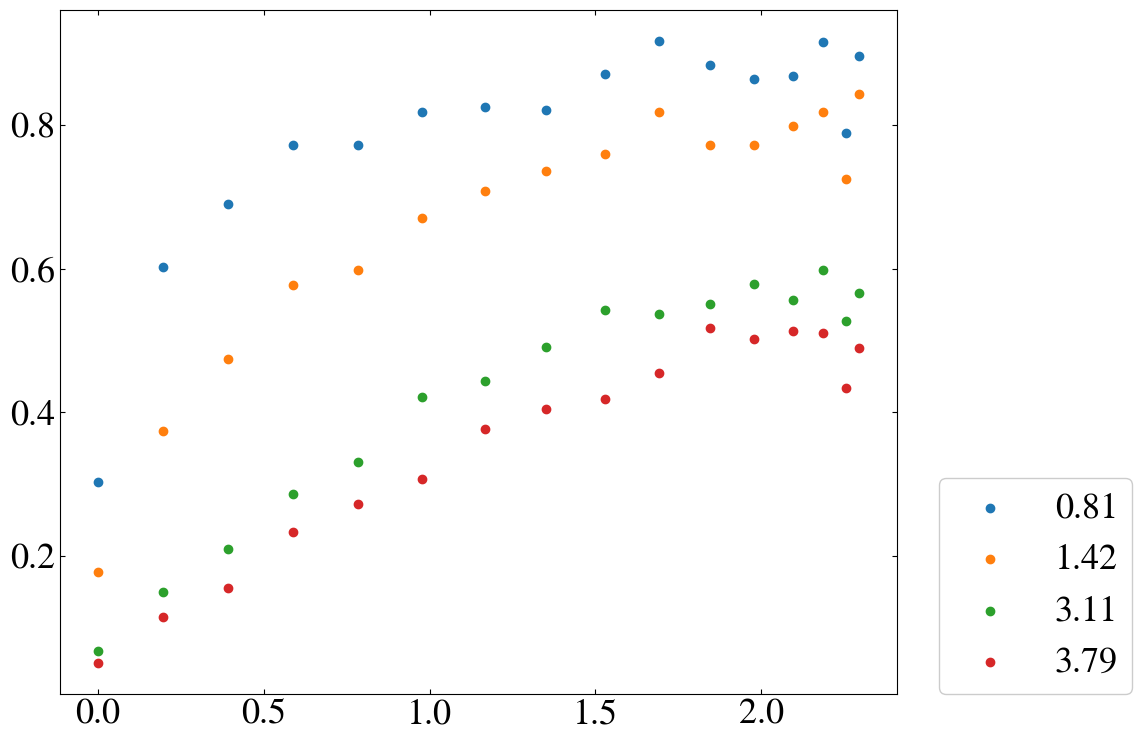

In [53]:
plt.figure(figsize=(12,8))
for q_index in [10,50,-100, -10]:
    norm_mask = q_norm == q_norm[q_index]
    zero_mask = q_norm == 0.
    
    plt.scatter(q0[norm_mask],np.asarray([d.mean for d in D[norm_mask]])/np.asarray([d.mean for d in D[zero_mask]]),label=f"{q_norm[q_index]:.2f}")
plt.legend(loc=(1.05,0))
    #plt.yscale('log')